In [ ]:
!wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip" -O "C:\Clarenti\Data\Project\ML\Program\Dataset\HorseOrHuman\\train\horse-or-human.zip"
!wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip" -O "C:\Clarenti\Data\Project\ML\Program\Dataset\HorseOrHuman\\validation\validation-horse-or-human.zip"

In [ ]:
import os
import zipfile

In [ ]:
base = 'C:\Clarenti\Data\Project\ML\Program\Dataset\HorseOrHuman'
train_local_zip = os.path.join(base, 'train')
validation_local_zip = os.path.join(base, 'validation')

In [ ]:
train_zip_ref = zipfile.ZipFile(train_local_zip, 'r')
validation_zip_ref = zipfile.ZipFile(validation_local_zip, 'r')
train_zip_ref.extractall(train_local_zip)
validation_zip_ref.extractall(validation_local_zip)

train_zip_ref.close()
validation_zip_ref.close()

## Dataset

In [ ]:
import numpy as np
import cv2

In [ ]:
# Directory
train_horse_dir = os.path.join(train_local_zip, "horses")
train_human_dir = os.path.join(train_local_zip, "humans")

valid_horse_dir = os.path.join(validation_local_zip, "horses")
valid_human_dir = os.path.join(validation_local_zip, "humans")

In [ ]:
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(valid_horse_dir)))

In [ ]:
train_horse_names = os.listdir(train_horse_dir)

path = (os.path.join(train_horse_dir, train_horse_names[0]))

assert os.path.isfile(path) # ensure that the path is a file

with open(os.path.join(train_horse_dir, train_horse_names[0]), 'r') as img :
    img = cv2.imread(img.name)
    imgarr = np.asarray(img)
    print(imgarr.shape)

In [77]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_local_zip,
    target_size=(300, 300),
    batch_size=25,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_local_zip,
    target_size=(300, 300),
    batch_size=25,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [87]:
input = Input(shape=(300, 300, 3), name="INPUT")

conv1 = Conv2D(32, (3,3), activation='relu', name="CONV1")(input)
pool1 = MaxPooling2D(pool_size=(2,2), name="POOL1")(conv1)
conv2 = Conv2D(64, (3,3), activation='relu', name="CONV2")(pool1)
pool2 = MaxPooling2D(pool_size=(2,2), name="POOL2")(conv2)
pool2 = Dropout(0.3)(pool2)
conv3 = Conv2D(128, (3,3), activation='relu', name="CONV3")(pool2)
pool3 = MaxPooling2D(pool_size=(2,2), name="POOL3")(conv3)
pool3 = Dropout(0.3)(pool3)

flatten = Flatten()(pool3)
hidden = Dense(512, activation='relu')(flatten)
hidden = Dense(128, activation='relu')(hidden)
output = Dense(1, activation='sigmoid')(hidden)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 300, 300, 3)]     0         
                                                                 
 CONV1 (Conv2D)              (None, 298, 298, 32)      896       
                                                                 
 POOL1 (MaxPooling2D)        (None, 149, 149, 32)      0         
                                                                 
 CONV2 (Conv2D)              (None, 147, 147, 64)      18496     
                                                                 
 POOL2 (MaxPooling2D)        (None, 73, 73, 64)        0         
                                                                 
 dropout_19 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 CONV3 (Conv2D)              (None, 71, 71, 128)       738

In [88]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics='accuracy')

In [89]:
hist = model.fit(train_generator, validation_data=validation_generator, epochs=4, verbose=1)

Epoch 1/4
42/42 [==============================] - 172s 4s/step - loss: 1.7276 - accuracy: 0.5930 - val_loss: 0.6940 - val_accuracy: 0.5195
Epoch 2/4
42/42 [==============================] - 159s 4s/step - loss: 0.2082 - accuracy: 0.9114 - val_loss: 2.4309 - val_accuracy: 0.7383
Epoch 3/4
42/42 [==============================] - 159s 4s/step - loss: 0.0491 - accuracy: 0.9776 - val_loss: 2.3594 - val_accuracy: 0.7773
Epoch 4/4
42/42 [==============================] - 161s 4s/step - loss: 0.0528 - accuracy: 0.9796 - val_loss: 1.8186 - val_accuracy: 0.7930


## Predict

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

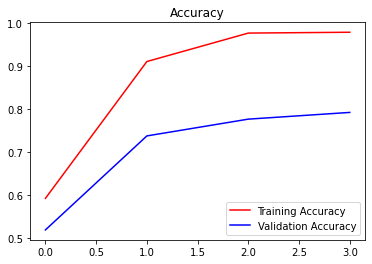

In [91]:
epochs = range(len(acc))

fig =  plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


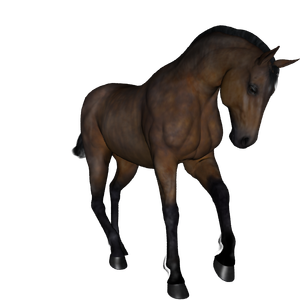

1/1 [==============================] - 0s 116ms/step
[1.]
is a horse


In [99]:
from IPython.display import Image

test_dir = "C:\Clarenti\Data\Project\ML\Program\Dataset\HorseOrHuman/test"
test_names = os.listdir(test_dir)

with open(os.path.join(test_dir, test_names[0]), 'r') as f:
    display(Image(filename=f.name))

    img = cv2.imread(f.name)
    imgarr = np.asarray(img)
    imgarr = np.expand_dims(imgarr, axis=0)
    imgs = np.vstack([imgarr]) # stack vertically
    classes = model.predict(imgs, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print("is a horse")
    else:
        print("is a human")